In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib

In [146]:
data = pd.read_csv('./market_order.csv', low_memory=False)
data = data.dropna()

In [147]:
display(data.head())
display(data.info())
display(data.isna().sum())
display(data.describe())

,OrderId,ItemId,LocationId,QualityLevel,UnitPriceSilver,Amount,AuctionType,Tier,Subtier,Trusted
0,1.045748e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23738,4,offer,1,0,True
1,1.045752e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23736,1,offer,1,0,True
2,1.045749e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23738,13,offer,1,0,True
3,1.045745e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23739,16,offer,1,0,True
4,1.045742e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23741,2,offer,1,0,True


<class 'pandas.core.frame.DataFrame'>
Index: 3318020 entries, 0 to 3318736
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   OrderId          float64
 1   ItemId           object 
 2   LocationId       int64  
 3   QualityLevel     int64  
 4   UnitPriceSilver  int64  
 5   Amount           int64  
 6   AuctionType      object 
 7   Tier             int64  
 8   Subtier          int64  
 9   Trusted          bool   
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 256.3+ MB


None

OrderId            0
ItemId             0
LocationId         0
QualityLevel       0
UnitPriceSilver    0
Amount             0
AuctionType        0
Tier               0
Subtier            0
Trusted            0
dtype: int64

,OrderId,LocationId,QualityLevel,UnitPriceSilver,Amount,Tier,Subtier
count,3.318020e+06,3.318020e+06,3.318020e+06,3.318020e+06,3.318020e+06,3.318020e+06,3.318020e+06
mean,1.215091e+10,2.343010e+03,1.964137e+00,3.251179e+05,9.402021e+01,5.151607e+00,6.869169e-01
std,9.300996e+09,1.307960e+03,1.112801e+00,2.423600e+06,5.686026e+02,1.680545e+00,1.022143e+00
min,3.817110e+05,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.046150e+10,1.002000e+03,1.000000e+00,2.299000e+03,1.000000e+00,4.000000e+00,0.000000e+00
50%,1.046929e+10,3.003000e+03,2.000000e+00,1.545100e+04,1.000000e+00,5.000000e+00,0.000000e+00
75%,1.047739e+10,3.008000e+03,3.000000e+00,8.027425e+04,5.000000e+00,6.000000e+00,1.000000e+00
max,9.999932e+10,5.003000e+03,5.000000e+00,1.000000e+09,9.999000e+03,8.000000e+00,4.000000e+00


In [148]:

labelEncoderItemId = LabelEncoder()
labelEncoderAuctionType = LabelEncoder()
labelEncoderLocationId = LabelEncoder()
labelEncoderTrusted = LabelEncoder()

# Обучаем энкодеры, чтобы в дальнейшем их сохранить и использовать на входных данных
data['ItemId'] = labelEncoderItemId.fit_transform(data['ItemId'].values)
data['AuctionType'] = labelEncoderAuctionType.fit_transform(data['AuctionType'].values)
data['LocationId'] = labelEncoderLocationId.fit_transform(data['LocationId'].values)
data['Trusted'] = labelEncoderTrusted.fit_transform(data['Trusted'].values)

display(data.head())

,OrderId,ItemId,LocationId,QualityLevel,UnitPriceSilver,Amount,AuctionType,Tier,Subtier,Trusted
0,1.045748e+10,8196,1,1,23738,4,0,1,0,1
1,1.045752e+10,8196,1,1,23736,1,0,1,0,1
2,1.045749e+10,8196,1,1,23738,13,0,1,0,1
3,1.045745e+10,8196,1,1,23739,16,0,1,0,1
4,1.045742e+10,8196,1,1,23741,2,0,1,0,1


In [149]:
X = data.drop('Trusted', axis=1) # признаки
y = data['Trusted'] # целевая переменная

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [151]:
# Масштабируем данные
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

display(X_test_scaled)
display(y_train)

array([[-0.18226127,  0.89023907, -1.50341987, ..., -0.50924758,
         1.09968647,  0.30587406],
       [-0.1795979 ,  1.09603271,  0.89273456, ..., -0.50924758,
         1.09968647, -0.67222017],
       [-0.18099674,  0.5965636 , -0.5449581 , ..., -0.50924758,
         0.50454939, -0.67222017],
       ...,
       [ 0.02864547,  1.54824878, -0.06572721, ..., -0.50924758,
         1.69482355, -0.67222017],
       [-0.18161905, -1.03212083, -1.50341987, ...,  1.96368141,
        -0.68572476,  1.28396829],
       [-0.18276293,  0.57978214, -0.5449581 , ..., -0.50924758,
         0.50454939,  0.30587406]])

array([1, 1, 1, ..., 1, 1, 0])

In [152]:
# rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc = RandomForestClassifier()

In [153]:
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

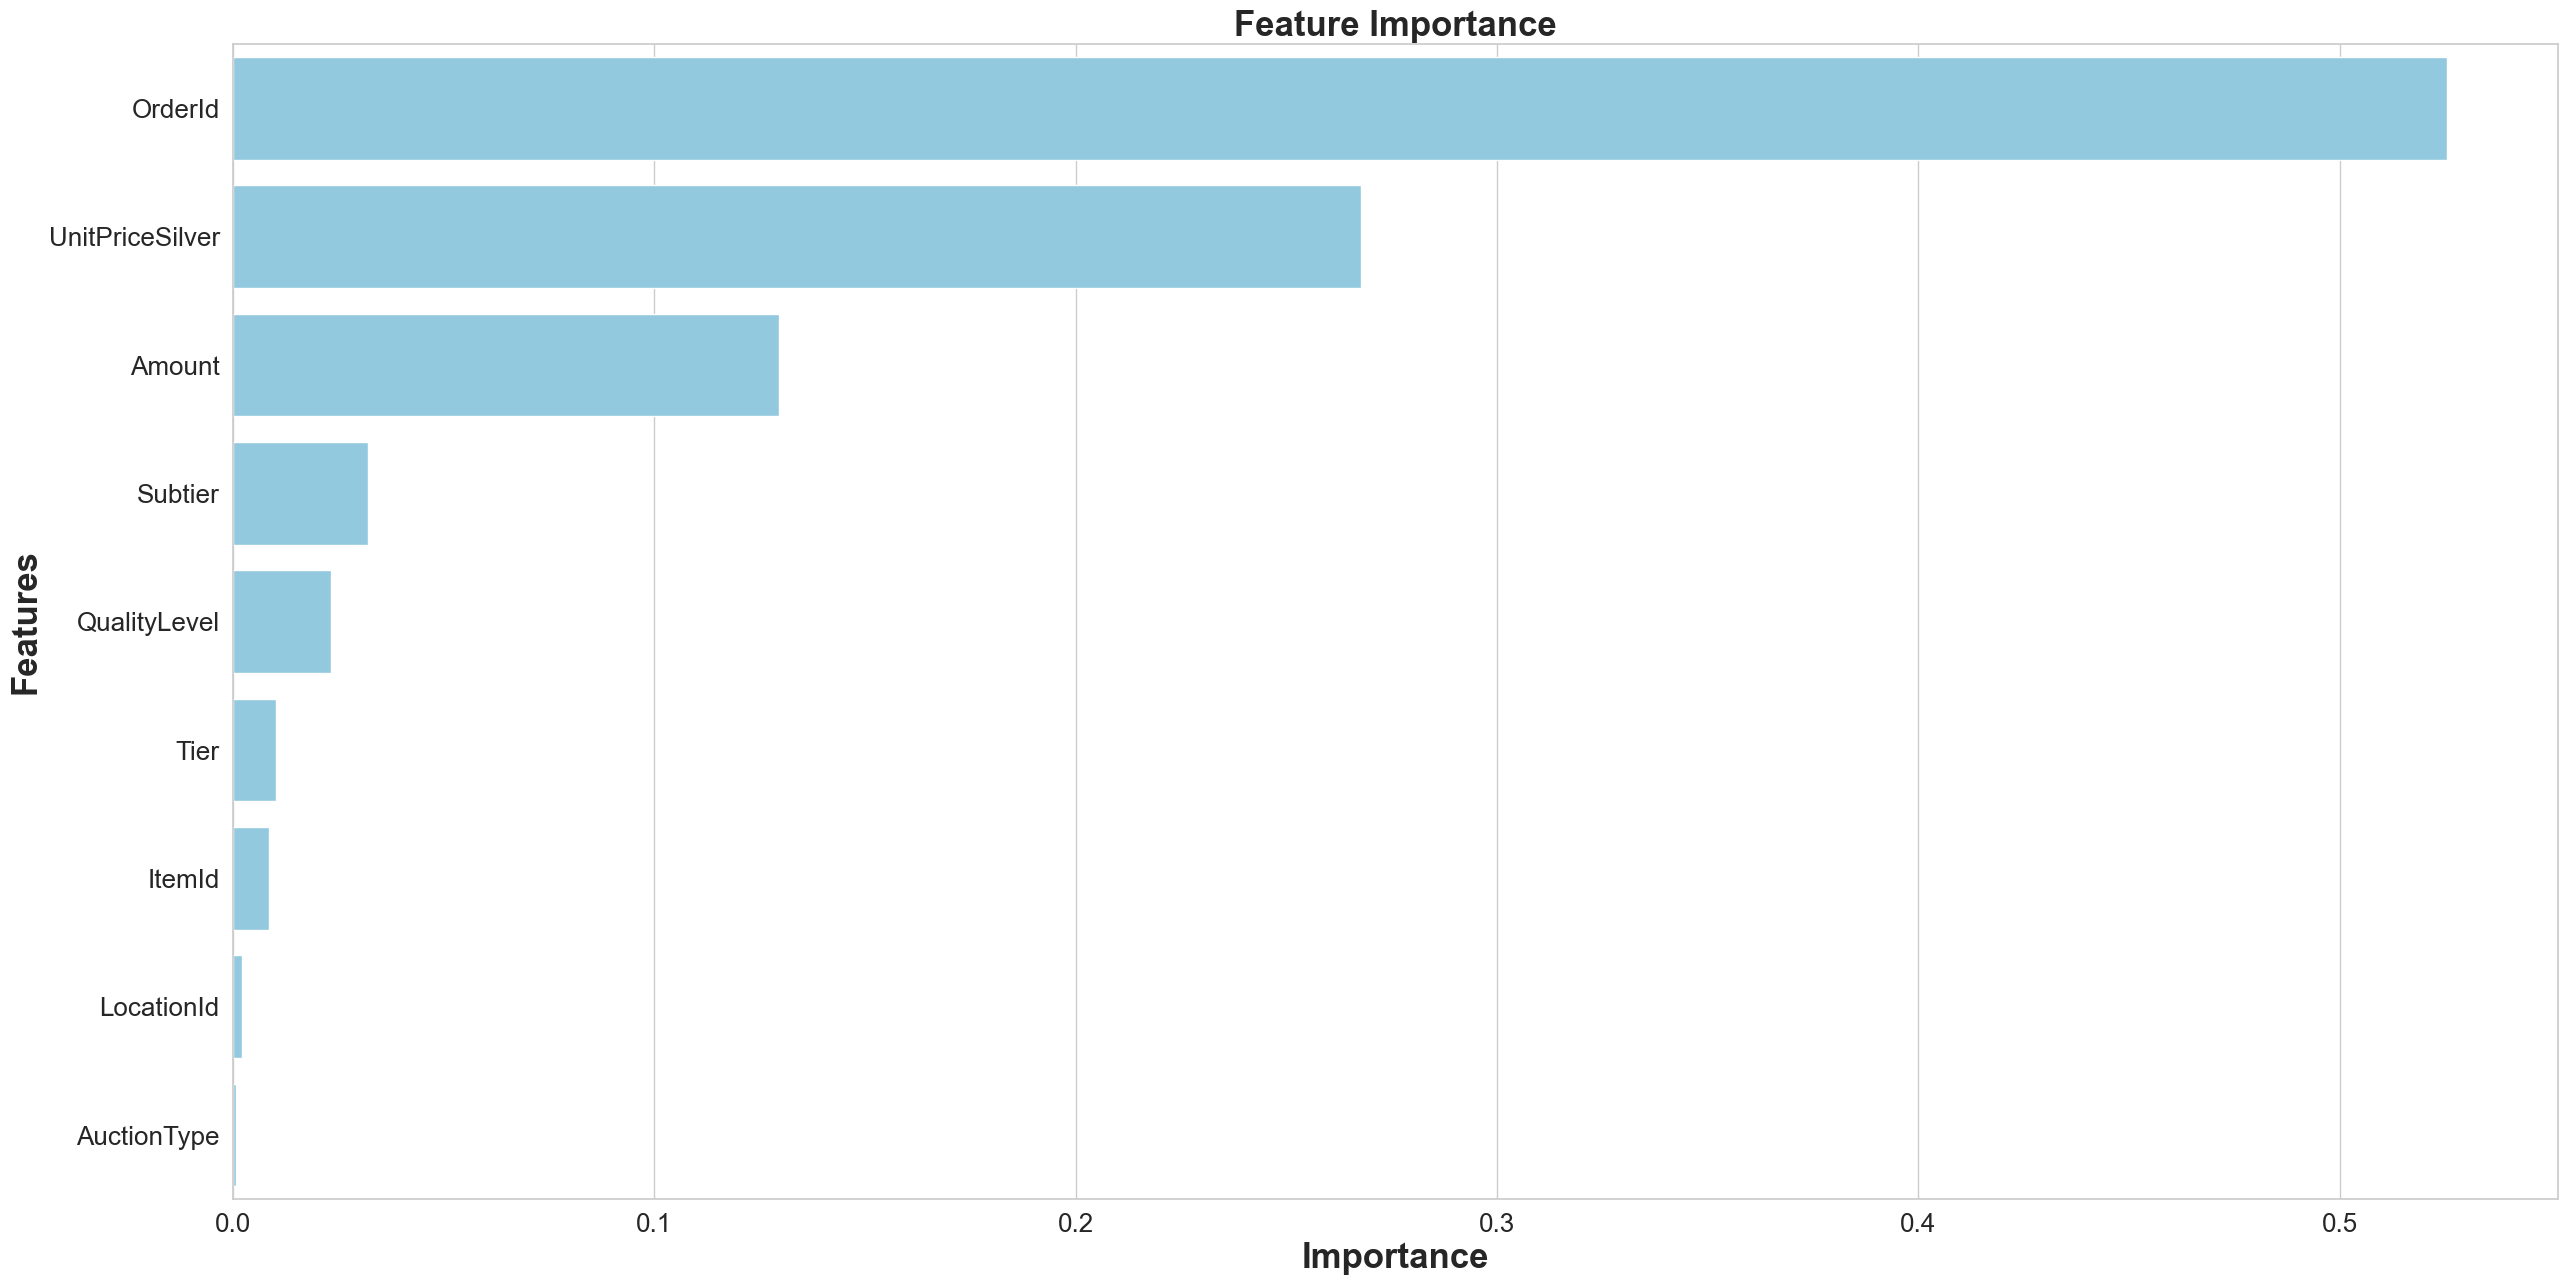

None

,Features,Gini-Importance
0,OrderId,0.525512
1,UnitPriceSilver,0.267751
2,Amount,0.129669
3,Subtier,0.032075
4,QualityLevel,0.023209
5,Tier,0.010225
6,ItemId,0.008599
7,LocationId,0.002224
8,AuctionType,0.000737


In [154]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

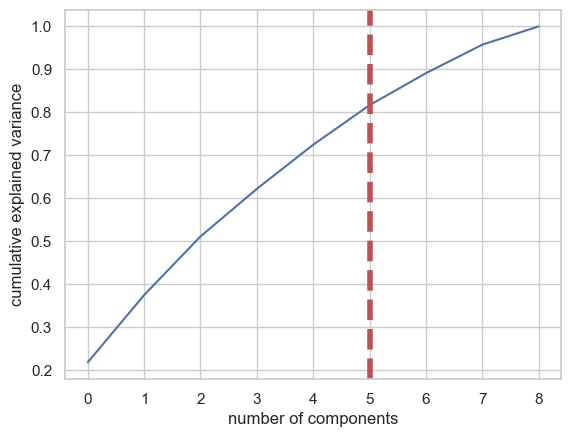

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.217832,0.217832
1,0.374502,0.156669
2,0.510984,0.136482
3,0.621762,0.110778
4,0.724484,0.102721
5,0.816550,0.092067
6,0.891107,0.074557
7,0.957416,0.066309
8,1.000000,0.042584


In [155]:
pca_test = PCA(n_components=9)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [156]:
y_pred = rfc.predict(X_test_scaled)

In [164]:
from sklearn.metrics import confusion_matrix
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual Untrusted', 'actual Trusted'], columns = ['predicted Untrusted', 'predicted Trusted'])
display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))


,predicted Untrusted,predicted Trusted
actual Untrusted,24471,10
actual Trusted,1,639122


'Baseline Random Forest recall score'

0.9999984353559487

In [163]:
joblib.dump(rfc, './build/neural_network.pkl')

joblib.dump(labelEncoderItemId, './build/labelEncoderItemId.pkl')
joblib.dump(labelEncoderAuctionType, './build/labelEncoderAuctionType.pkl')
joblib.dump(labelEncoderLocationId, './build/labelEncoderLocationId.pkl')
joblib.dump(labelEncoderTrusted, './build/labelEncoderTrusted.pkl')

joblib.dump(ss, './build/standardscaler.pkl')

['./build/standardscaler.pkl']

array([-0.18226127,  0.89023907, -1.50341987,  0.93105799, -0.05084473,
       -0.16377395, -0.50924758,  1.09968647,  0.30587406])

In [159]:
labelEncoderItemId.transform(['TREASURE_KNOWLEDGE_RARITY3', 'T7_SOUL'])

array([8196, 6652])